# Debugging BlackBox
In this tutorial we will try to debug our black models aka, Neural Networks. We will learn how to visualize learned filters and feature maps of a pretrained neural network.

In [0]:
# Import libraries
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

## Utility Functions

In [0]:
def visualize_filters(filters, filter_indexes, channel_indexes, layer_name, 
                      save_fig=False):
  fig = plt.figure()
  n_rows = len(filter_indexes)
  n_cols = len(channel_indexes)
  img_no = 1
  fig.suptitle(f'{layer_name}', fontsize=15)

  for filter_index in filter_indexes:
    filter = filters[:, :, :, filter_index]
    # Normalizing filter values between 0-1 for visualization
    min_val, max_val = filter.min(), filter.max()
    filter = (filter - min_val) / (max_val - min_val)
    
    for channel_index in channel_indexes:
      plt.subplot(n_rows, n_cols, img_no)
      #plt.title(f"F-{filter_index}, C-{channel_index}")
      plt.axis("off")
      plt.imshow(filter[:, :, channel_index])
      img_no += 1

  plt.show()
  if save_fig:
    fig.savefig(f"{layer_name}-filters.png")

In [0]:
def visualize_feature_maps(feature_map, rows, cols, layer_name, save_fig=False):
  fig = plt.figure()
  fig.suptitle(f'{layer_name}', fontsize=15)
  img_no = 1
  
  for _ in range(rows):
    for _ in range(cols):
      plt.subplot(rows, cols, img_no)
      plt.axis("off")
      plt.imshow(feature_map[:, :, img_no-1])
      img_no += 1

  plt.show()
  if save_fig:
    fig.savefig(f"{layer_name}-feature_maps.png")

In [0]:
def get_custom_model(layer_names):
  output_layers = [vgg.get_layer(name).output for name in layer_names]
  model = tf.keras.Model(vgg.input, output_layers)
  return model

## Loading Pretrained Network
For this tutorial we will try to visualize VGG19

In [0]:
# Loading VGG19
vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
vgg.trainable = False

# Initialize our model
model = get_custom_model(layer_names)

In [0]:
# Defining our layer names
layer_names = ["block1_conv1", "block2_conv1", "block3_conv1", "block4_conv1", 
                "block5_conv1"]

## Let's Visualize Filters
Visualization of filters simple means looking at their learned weights.

In [0]:
# Let's find out filter shapes for every convolutional layer
layers_map = {}

for index, layer in enumerate(vgg.layers):
  layer_name = layer.name
  if "conv" in layer_name:
    layers_map[layer_name] = index

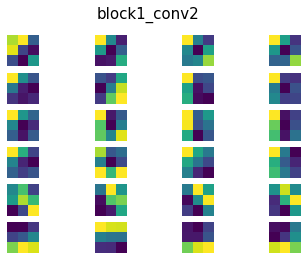

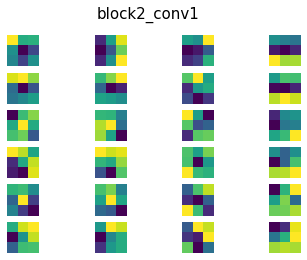

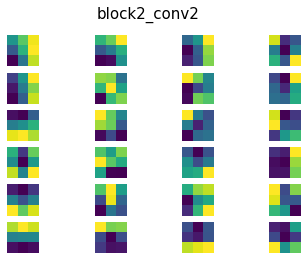

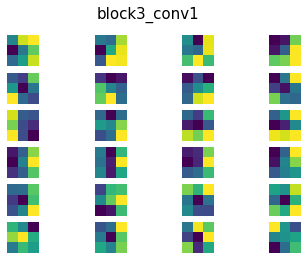

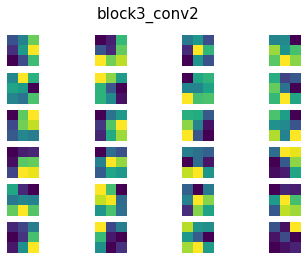

In [88]:
filter_indexes = [0, 1, 3, 61, 62, 63]
channel_indexes = [0, 1, 62, 63]
count, end = 1, 5

for layer_name, index in layers_map.items():
  if "block1_conv1" == layer_name:
    continue
  filters, _ = vgg.layers[index].get_weights()
  visualize_filters(filters, filter_indexes, channel_indexes, layer_name, True)
  count += 1
  if count > end:
    break

## Let's Visualize Feature Maps

In [0]:
# Preparing input image
raw_img = tf.io.read_file("test.jpg")
img = tf.io.decode_image(raw_img, channels=3, dtype=tf.float32)
img = tf.image.resize(img, [224, 224])

In [0]:
# Preparing input image for VGG19
img *= 255.0
img = img[tf.newaxis, ...]
preprocess_img = tf.keras.applications.vgg19.preprocess_input(img)

# Forward pass
outputs = model(preprocess_img)  

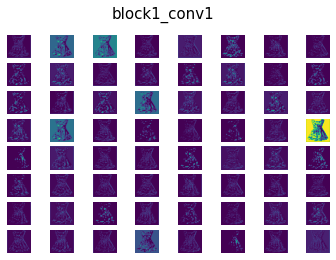

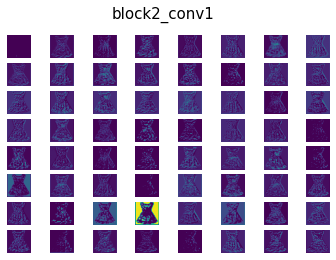

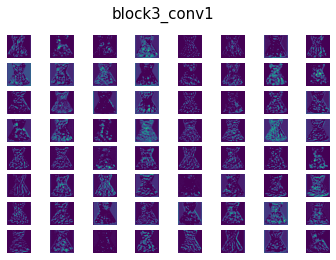

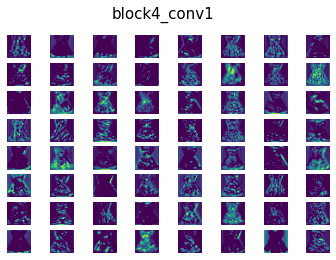

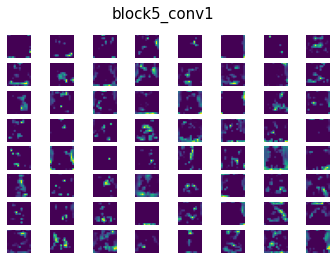

In [91]:
for index, layer_name in enumerate(layer_names):
  visualize_feature_maps(outputs[index][0], 8, 8, layer_name, True)